### Linear Regression

In [1]:
import numpy as np
import scipy as sp
import scipy.io as io
import matplotlib.pyplot as plt

# PLT Style STIx
plt.rcParams["font.family"] = "STIxGeneral"

In [2]:
car_data = io.loadmat("cardata.mat")
x_raw = car_data["Horsepower"]
y_raw = car_data["MPG"] # Miles per Gallon

valid_idx = ~np.isnan(x_raw) & ~np.isnan(y_raw)

x = x_raw[valid_idx].reshape(-1, 1)
y = y_raw[valid_idx].reshape(-1, 1)

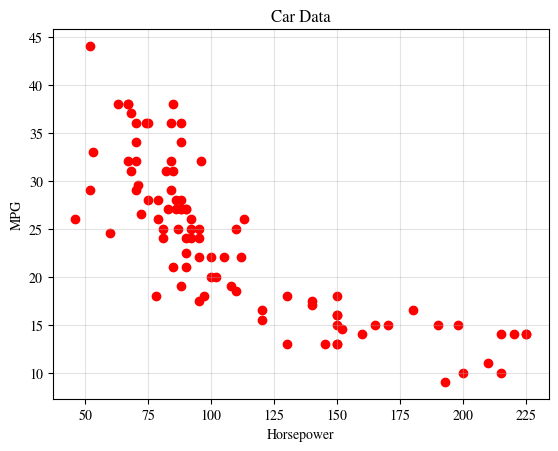

In [3]:
plt.scatter(x, y, marker="o", color="red")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.grid(alpha=0.35)
plt.title("Car Data")
plt.show()

In [4]:
r = np.corrcoef(x.T, y.T)[0, 1]
x_bar = np.mean(x)
y_bar = np.mean(y)
sig_x = np.std(x)
sig_y = np.std(y)

m = r * sig_y / sig_x
y_fit = m * (x - x_bar) + y_bar

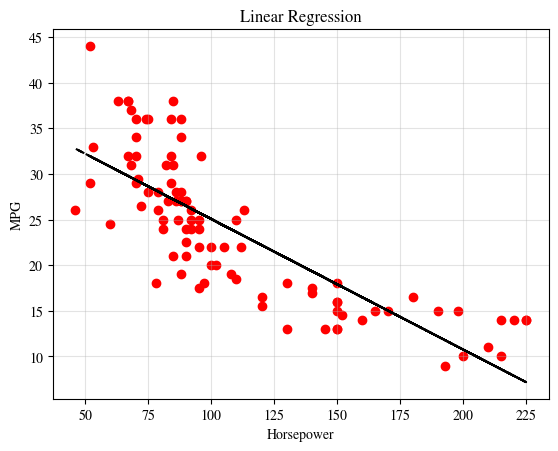

In [5]:
plt.scatter(x, y, marker="o", color="red")
plt.plot(x, y_fit, color="k", linestyle="--")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.grid(alpha=0.35)
plt.title("Linear Regression")
plt.show()

### Principal Component Analysis

In [6]:
iris_data = io.loadmat("iris_data.mat")
x = iris_data["iris"][:, :4]
y = iris_data["iris"][:, -1]

print("Feature shape: ", x.shape)
print("Label shape: ", y.shape)

Feature shape:  (150, 4)
Label shape:  (150,)


In [7]:
nd = 3

x_mean = np.mean(x, axis=0)
x = x - x_mean
covariance_matrix = np.cov(x, rowvar=False)

D, V = np.linalg.eig(covariance_matrix)

D = np.real(D)
ind = np.argsort(D)[::-1]

V = V[:, ind]
P = V[:, :nd]  # projection matrix

X = np.dot(x, P)  # projected data

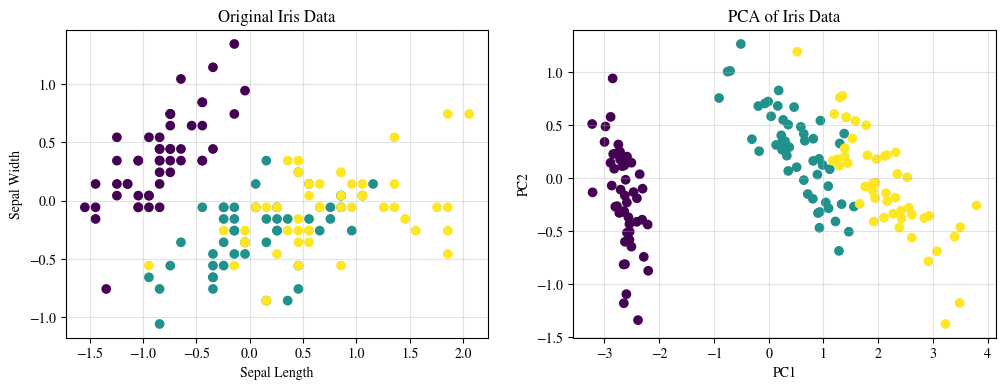

In [8]:
# Plot with corresponding labels
fix, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(x[:, 0], x[:, 1], c=y)
ax[0].set_xlabel("Sepal Length")
ax[0].set_ylabel("Sepal Width")
ax[0].set_title("Original Iris Data")
ax[0].grid(alpha=0.35)
ax[1].scatter(X[:, 0], X[:, 1], c=y)
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC2")
ax[1].set_title("PCA of Iris Data")
ax[1].grid(alpha=0.35)
plt.show()

### Linear Discriminant Analysis

In [9]:
import numpy as np
import scipy as sp
import scipy.io as io
import matplotlib.pyplot as plt

# PLT Style STIx
plt.rcParams["font.family"] = "STIxGeneral"

In [10]:
iris_data = io.loadmat("iris_data.mat")
x = iris_data["iris"][:, :4]
y = iris_data["iris"][:, -1]

print("Feature shape: ", x.shape)
print("Label shape: ", y.shape)

Feature shape:  (150, 4)
Label shape:  (150,)


In [15]:
def LDA_func(X, L):
    classes = np.unique(L)
    k = len(classes)  # number of classes
    n = np.zeros(k)  # number of samples in each class
    C = []
    M = np.mean(X, axis=0)
    S = []
    Sw = np.zeros((X.shape[1], X.shape[1]))
    Sb = np.zeros((X.shape[1], X.shape[1]))

    for j in range(k):
        Xj = X[L == classes[j]]
        n[j] = Xj.shape[0]  # Class sample size
        Cj = np.mean(Xj, axis=0)  # Class mean
        C.append(Cj)
        Sj = np.zeros((X.shape[1], X.shape[1]))
        for i in range(int(n[j])):
            diff = Xj[i] - Cj
            Sj += np.outer(diff, diff)
        S.append(Sj)
        Sw += Sj
        Sb += n[j] * np.outer(Cj - M, Cj - M)
        
    print("Sw shape: ", Sw.shape)
    print("Sb shape: ", Sb.shape)

    # W, lambda_ = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
    # lambda_ = np.real(lambda_)
    # SortOrder = np.argsort(lambda_)[::-1]
    # lambda_ = lambda_[SortOrder]
    # W = W[SortOrder]
    
    # Corrected version
    D, V = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
    D = np.real(D)
    ind = np.argsort(D)[::-1]
    V = V[:, ind]
    W = V
    lambda_ = D

    X_new = X.dot(W)
    return np.real(X_new), W, lambda_

In [16]:
x_new, W, _ = LDA_func(x, y)

Sw shape:  (4, 4)
Sb shape:  (4, 4)


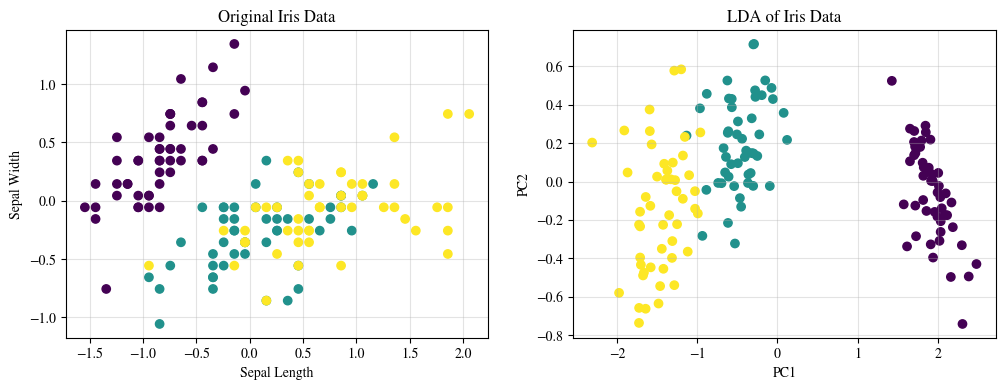

In [13]:
# Plot with corresponding labels
fix, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(x[:, 0], x[:, 1], c=y)
ax[0].set_xlabel("Sepal Length")
ax[0].set_ylabel("Sepal Width")
ax[0].set_title("Original Iris Data")
ax[0].grid(alpha=0.35)
ax[1].scatter(x_new[:, 0], x_new[:, 1], c=y)
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC2")
ax[1].set_title("LDA of Iris Data")
ax[1].grid(alpha=0.35)
plt.show()